In [29]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [33]:
url = "https://contratos.comprasnet.gov.br/api/contrato/ug/113601"
response = requests.get(url)

data = response.json()
df = pd.DataFrame(data)


df.head(5)

,id,receita_despesa,numero,contratante,fornecedor,codigo_tipo,tipo,subtipo,prorrogavel,situacao,...,data_publicacao,data_proposta_comercial,vigencia_inicio,vigencia_fim,valor_inicial,valor_global,num_parcelas,valor_parcela,valor_acumulado,links
0,2443,Despesa,00006/2019,"{'orgao_origem': {'codigo': '61201', 'nome': '...","{'tipo': 'JURIDICA', 'cnpj_cpf_idgener': '00.0...",50,Contrato,None,None,Ativo,...,2019-02-04,None,2019-02-04,2025-02-04,"0,01","0,01",1,"0,01","0,61",{'historico': 'https://contratos.comprasnet.go...
1,2447,Despesa,00020/2019,"{'orgao_origem': {'codigo': '61201', 'nome': '...","{'tipo': 'JURIDICA', 'cnpj_cpf_idgener': '69.1...",50,Contrato,None,Sim,Ativo,...,2021-02-18,None,2019-09-12,2024-09-12,"13.994,28","16.734,14",12,"1.394,51","75.404,49",{'historico': 'https://contratos.comprasnet.go...
2,2457,Despesa,00026/2019,"{'orgao_origem': {'codigo': '61201', 'nome': '...","{'tipo': 'JURIDICA', 'cnpj_cpf_idgener': '03.1...",50,Contrato,None,None,Ativo,...,2019-12-18,None,2019-12-16,2024-12-16,"2.055.393,36","2.726.804,99",12,"227.233,75","12.134.728,30",{'historico': 'https://contratos.comprasnet.go...
3,2776,Despesa,00023/2019,"{'orgao_origem': {'codigo': '61201', 'nome': '...","{'tipo': 'JURIDICA', 'cnpj_cpf_idgener': '18.0...",50,Contrato,None,Sim,Ativo,...,2019-11-08,None,2019-11-05,2025-05-05,"83.863,32","68.670,66",12,"5.722,56","577.028,22",{'historico': 'https://contratos.comprasnet.go...
4,4260,Despesa,00027/2019,"{'orgao_origem': {'codigo': '61201', 'nome': '...","{'tipo': 'JURIDICA', 'cnpj_cpf_idgener': '00.6...",50,Contrato,None,Não,Ativo,...,2019-12-24,None,2020-04-27,2025-04-27,"512.000,00","0,00",1,"0,00","0,00",{'historico': 'https://contratos.comprasnet.go...


In [31]:
if data:
    # Convertendo os dados para um DataFrame
    df = pd.DataFrame(data)
    
    # Selecionando colunas numéricas
    numeric_columns = df.select_dtypes(include=['number'])
else:
    print("Nenhum dado disponível na resposta da API.")


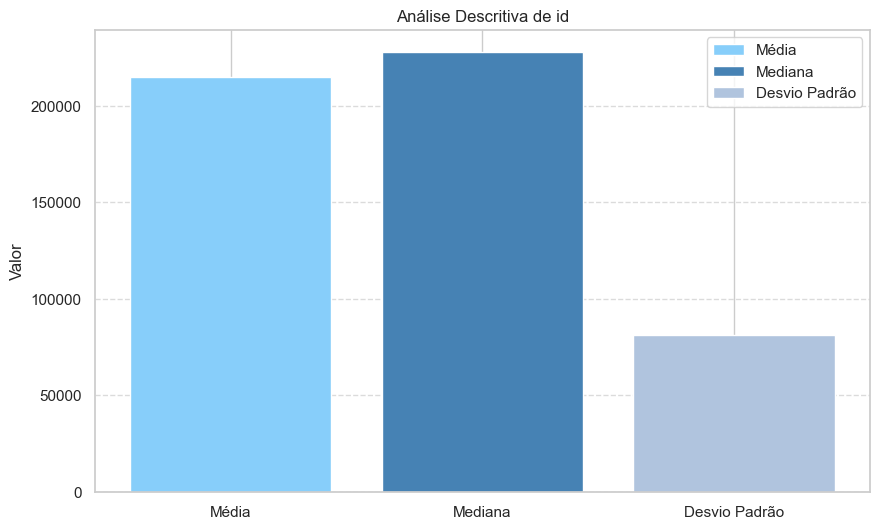

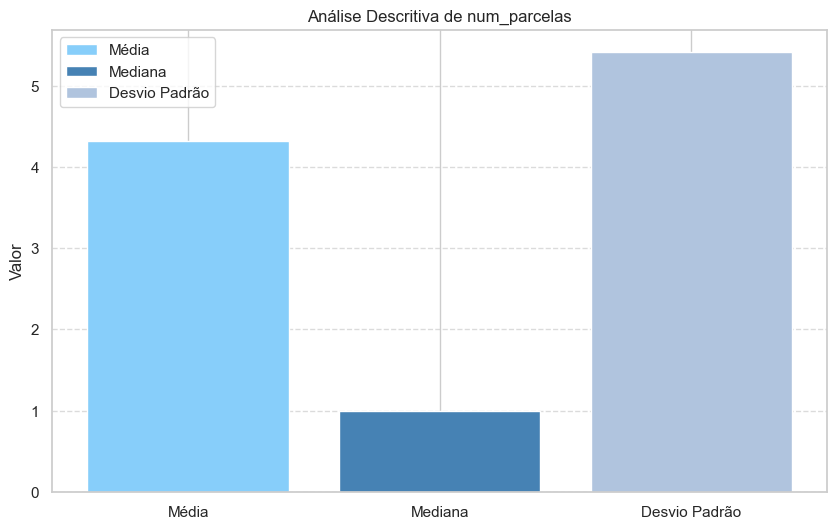

In [49]:
if not numeric_columns.empty:
    # Criando gráficos para cada métrica estatística
    for col in numeric_columns.columns:
        plt.figure(figsize=(10, 6))
        
        # Média
        plt.bar(['Média'], [numeric_columns[col].mean()], color='#87CEFA', label='Média')
        
        # Mediana
        plt.bar(['Mediana'], [numeric_columns[col].median()], color='#4682B4', label='Mediana')
        
        # Desvio Padrão
        plt.bar(['Desvio Padrão'], [numeric_columns[col].std()], color='#B0C4DE', label='Desvio Padrão')
        
        # Configurações do gráfico
        plt.title(f"Análise Descritiva de {col}")
        plt.ylabel('Valor')
        plt.legend()
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
else:
    print("Não há colunas numéricas para análise.")


In [39]:
if not df.empty:
    # Detectar valores nulos
    missing_values = df.isnull().sum()
    inconsistent_columns = missing_values[missing_values > 0]
    
    # Detectar duplicatas somente em colunas hashable (excluindo listas ou dicionários)
    hashable_columns = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, (str, int, float, type(None)))).all()]
    duplicates = df[hashable_columns].duplicated().sum()
    
    # Resumo
    print("Resumo de Inconsistências:")
    if not inconsistent_columns.empty:
        print("Colunas com valores nulos:")
        print(inconsistent_columns)
    else:
        print("Nenhuma inconsistência de valores nulos encontrada.")
    
    print(f"Número de linhas duplicadas: {duplicates}")
else:
    print("Nenhum dado disponível para análise.")

Resumo de Inconsistências:
Colunas com valores nulos:
subtipo                     145
prorrogavel                  12
justificativa_inativo       147
subcategoria                147
unidades_requisitantes       65
informacao_complementar     110
sistema_origem_licitacao    147
data_publicacao              16
data_proposta_comercial      75
vigencia_fim                  1
dtype: int64
Número de linhas duplicadas: 0


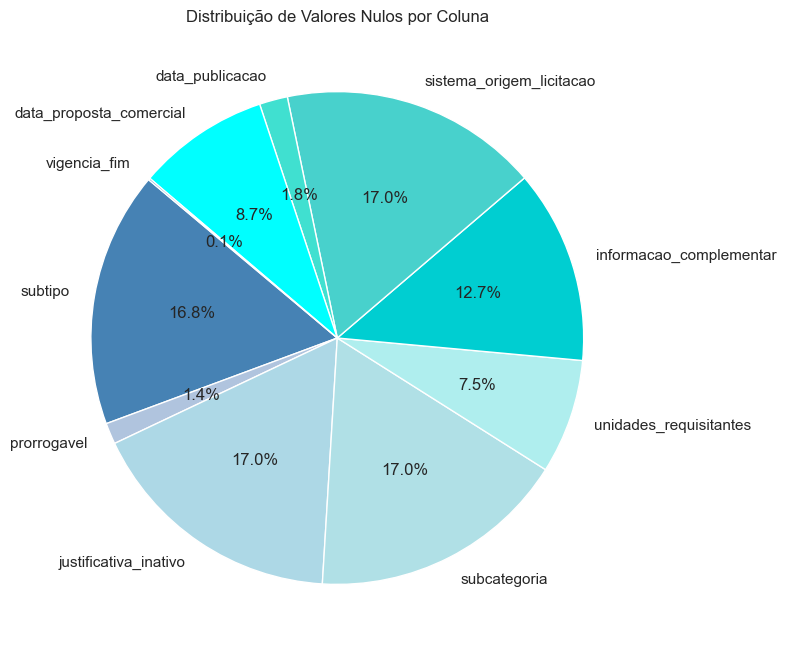

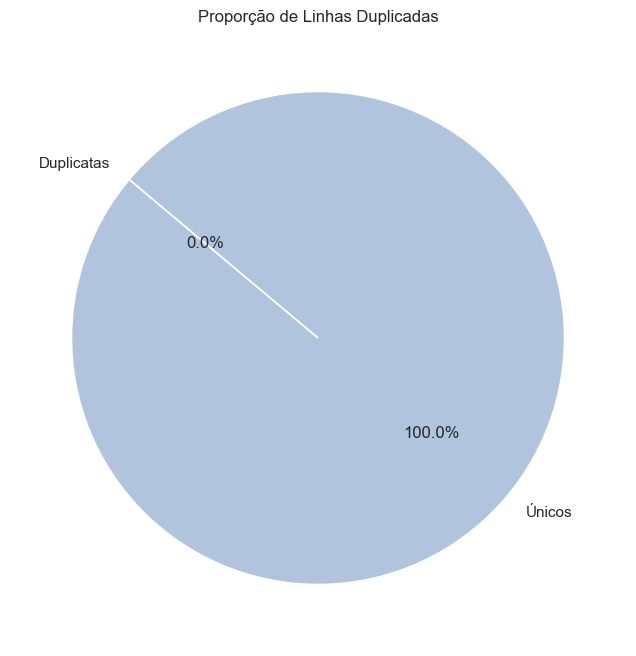

In [ ]:
if not inconsistent_columns.empty or duplicates >= 0:  # Permite gerar gráficos mesmo sem duplicatas ou nulos
    # Definindo a paleta de cores
    colors = [
        "#4682B4", "#B0C4DE", "#ADD8E6", "#B0E0E6",
        "#AFEEEE", "#00CED1", "#48D1CC", "#40E0D0", "#00FFFF"
    ]
    
    # Gráfico para valores nulos
    if not inconsistent_columns.empty:
        plt.figure(figsize=(8, 8))
        plt.pie(
            inconsistent_columns, 
            labels=inconsistent_columns.index, 
            autopct='%1.1f%%', 
            startangle=140, 
            colors=colors[:len(inconsistent_columns)]
        )
        plt.title("Distribuição de Valores Nulos por Coluna")
        plt.show()
    
    # Gráfico para duplicatas 
    total_rows = len(df)
    plt.figure(figsize=(8, 8))
    plt.pie(
        [duplicates, total_rows - duplicates], 
        labels=["Duplicatas", "Únicos"], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors[:2]  
    )
    plt.title("Proporção de Linhas Duplicadas")
    plt.show()
else:
    print("Nenhuma inconsistência significativa encontrada nos dados.")
